# Emotion Detection Feature Extraction #

In [2]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os

def extract_features(model, folder_path):
    # Get a list of all image files in the folder
    img_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Use list comprehension to process images and extract features
    features = []
    for img_path in img_paths:
        try:
            img = image.load_img(img_path, target_size=(299, 299))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            feature = model.predict(img_array)
            features.append(feature)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

    # Stack the extracted features into a single NumPy array
    features = np.vstack(features)

    return features

# Load the pre-trained InceptionV3 model without top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))  # Adjust input_shape accordingly

# Create a new model that includes only the convolutional base of InceptionV3
model = Model(inputs=base_model.input, outputs=base_model.output)

# Specify folder paths for emotion of child face image sets
angry_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'
fear_folder_path = '/Users/isurudissanayake/Desktop/ASD/Fear'
joy_folder_path = '/Users/isurudissanayake/Desktop/ASD/Happy'
# natural_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'
sadness_folder_path = '/Users/isurudissanayake/Desktop/ASD/Sad'
# surprise_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'

# Extract features for angry child faces
angry_features = extract_features(model, angry_folder_path)

# Extract features for fear child faces
fear_features = extract_features(model, fear_folder_path)

# Extract features for joy child faces
joy_features = extract_features(model, joy_folder_path)

# Extract features for natural child faces
# natural_features = extract_features(model, natural_folder_path)

# Extract features for sadness child faces
sadness_features = extract_features(model, sadness_folder_path)

# Extract features for surprise child faces
# surprise_features = extract_features(model, surprise_folder_path)

# Save the extracted features for later use in training
np.save('/Users/isurudissanayake/Desktop/FASD/InceptionV3/Anger/Anger.npy', angry_features)
np.save('/Users/isurudissanayake/Desktop/FASD/InceptionV3/Fear/Fear.npy', fear_features)
np.save('/Users/isurudissanayake/Desktop/FASD/InceptionV3/Haapy/Happy.npy', joy_features)
# np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/natural/natural_features.npy', natural_features)
np.save('/Users/isurudissanayake/Desktop/FASD/InceptionV3/Sad/Sad.npy', sadness_features)
# np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/surprise/surprise_features.npy', surprise_features)


1/1 [==============================] - 0s 57ms/step


# Emotion Detection Model Training #

/Users/isurudissanayake/Desktop/Tensorflow/env/lib/python3.10/site-packages/keras/preprocessing/image.py:2092: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (1027, 8, 8, 2048) (2048 channels).
  warnings.warn(
/Users/isurudissanayake/Desktop/Tensorflow/env/lib/python3.10/site-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1027, 8, 8, 2048) (2048 channels).
  warnings.warn(


Epoch 1/100


2024-04-03 18:48:02.926399: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-04-03 18:48:02.957975: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 28s 851ms/step - loss: 34.0497 - accuracy: 0.5823 - val_loss: 7.1934 - val_accuracy: 0.7687
Epoch 2/100
32/32 [==============================] - 21s 655ms/step - loss: 2.8517 - accuracy: 0.6680 - val_loss: 0.8478 - val_accuracy: 0.7642
Epoch 3/100
32/32 [==============================] - 21s 655ms/step - loss: 0.9245 - accuracy: 0.7332 - val_loss: 0.7145 - val_accuracy: 0.7687
Epoch 4/100
32/32 [==============================] - 20s 632ms/step - loss: 0.8979 - accuracy: 0.7244 - val_loss: 0.6968 - val_accuracy: 0.7687
Epoch 5/100
32/32 [==============================] - 20s 630ms/step - loss: 0.8700 - accuracy: 0.7371 - val_loss: 0.8170 - val_accuracy: 0.7710
Epoch 6/100
32/32 [==============================] - 21s 642ms/step - loss: 0.8515 - accuracy: 0.7352 - val_loss: 0.6997 - val_accuracy: 0.7687
Epoch 7/100
32/32 [==============================] - 21s 642ms/step - loss: 0.8708 - accuracy: 0.7410 - val_loss: 0.7434 - val_accuracy: 0.7687
Epo

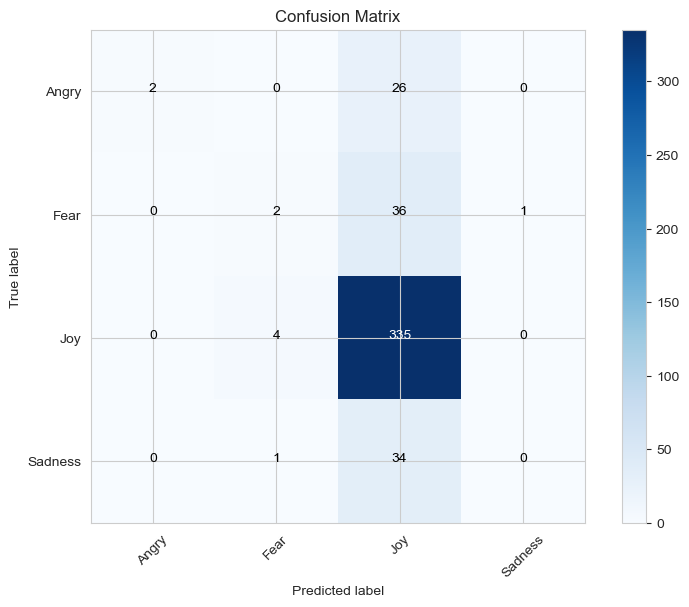

Classification Report:
              precision    recall  f1-score   support

       Angry       1.00      0.07      0.13        28
        Fear       0.29      0.05      0.09        39
         Joy       0.78      0.99      0.87       339
     Sadness       0.00      0.00      0.00        35

    accuracy                           0.77       441
   macro avg       0.52      0.28      0.27       441
weighted avg       0.69      0.77      0.69       441


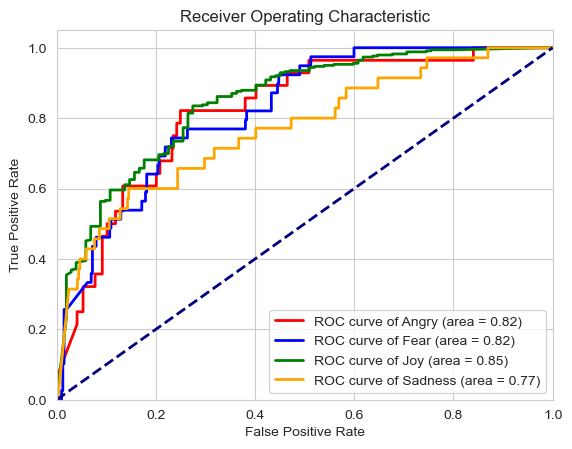

Root Mean Squared Error (RMSE): 0.6494372236659931
Mean Absolute Error (MAE): 0.2947845804988662
Matthews Correlation Coefficient (MCC): 0.11788731765166956


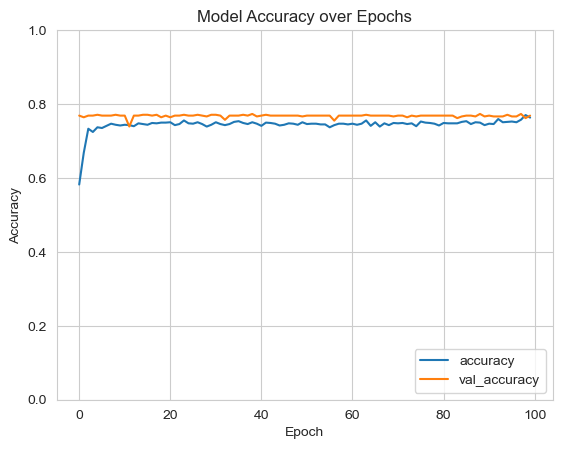

In [1]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import matthews_corrcoef


# Load the extracted features for emotions
angry_features = np.load('/Users/isurudissanayake/Desktop/FASD/InceptionV3/Anger/Anger.npy')
fear_features = np.load('/Users/isurudissanayake/Desktop/FASD/InceptionV3/Fear/Fear.npy')
joy_features = np.load('/Users/isurudissanayake/Desktop/FASD/InceptionV3/Haapy/Happy.npy')
sadness_features = np.load('/Users/isurudissanayake/Desktop/FASD/InceptionV3/Sad/Sad.npy')

# Assign labels
angry_labels = np.ones(angry_features.shape[0]) * 0
fear_labels = np.ones(fear_features.shape[0]) * 1
joy_labels = np.ones(joy_features.shape[0]) * 2
sadness_labels = np.ones(sadness_features.shape[0]) * 3

# Combine features and labels
X = np.vstack([angry_features, fear_features, joy_features, sadness_features])
y = np.concatenate([angry_labels, fear_labels, joy_labels, sadness_labels])

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# Model definition
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Assuming 4 emotions

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training with augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32,
                    epochs=100,
                    validation_data=(X_test, y_test))

# Save the trained model
model.save('/Users/isurudissanayake/Desktop/FASD/InceptionV3/emotion_model.h5')

# Model evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
class_names = ['Angry', 'Fear', 'Joy', 'Sadness']
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
class_names = ['Angry', 'Fear', 'Joy', 'Sadness']
report = classification_report(y_test, y_pred_classes, target_names=class_names, zero_division=0)
print("Classification Report:")
print(report)

# ROC Curve and AUC (only applicable for binary or multi-class classification)
if len(class_names) > 1:
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    colors = ['red', 'blue', 'green', 'orange']
    for i, color in zip(range(len(class_names)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label=f'ROC curve of {class_names[i]} (area = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_classes, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_classes)
print("Mean Absolute Error (MAE):", mae)

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred_classes)
print("Matthews Correlation Coefficient (MCC):", mcc)

# Learning Curve
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Model Accuracy over Epochs')
plt.legend(loc='lower right')
plt.show()


# Emotion Prediction #

In [3]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer

# Load the trained model
model = load_model('/Users/isurudissanayake/Desktop/FASD/InceptionV3/emotion_model.h5')

# Load the InceptionV3 model without the top classification layers
inceptionV3 = InceptionV3(weights='imagenet', include_top=False)

# Define a function to preprocess input image and extract features
def preprocess_image(image_path, feature_extraction_model):
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    # Reshape the features to match their actual shape
    features = np.reshape(features, (features.shape[0], features.shape[1], features.shape[2], features.shape[3]))

    return features


# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    return predicted_emotion, percentages

# Path to the input image
input_image_path = '/Users/isurudissanayake/Desktop/ASD/Anger/0866.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, model, inceptionV3)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)


1/1 [==============================] - 0s 126ms/step
Predicted Emotion: Angry
Prediction Percentages: {'Angry': 100.0, 'Fear': 30.05, 'Joy': 100.0, 'Sad': 99.86}


# ASD Detection Feature Extraction #

In [5]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os

def extract_features(model, folder_path):
    # Get a list of all image files in the folder
    img_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Use list comprehension to process images and extract features
    features = []
    for img_path in img_paths:
        try:
            img = image.load_img(img_path, target_size=(299, 299))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            feature = model.predict(img_array)
            features.append(feature)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

    # Stack the extracted features into a single NumPy array
    features = np.vstack(features)

    return features

# Load the pre-trained InceptionV3 model without top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))  # Adjust input_shape accordingly

# Create a new model that includes only the convolutional base of InceptionV3
model = Model(inputs=base_model.input, outputs=base_model.output)

asd_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD'
non_asd_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD'

# # Specify folder paths for emotion of child face image sets
# angry_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'
# fear_folder_path = '/Users/isurudissanayake/Desktop/ASD/Fear'
# joy_folder_path = '/Users/isurudissanayake/Desktop/ASD/Happy'
# # natural_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'
# sadness_folder_path = '/Users/isurudissanayake/Desktop/ASD/Sad'
# # surprise_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'

asd_features = extract_features(model, asd_folder_path)
non_asd_features = extract_features(model, non_asd_folder_path)
# Extract features for angry child faces
# angry_features = extract_features(model, angry_folder_path)
# 
# # Extract features for fear child faces
# fear_features = extract_features(model, fear_folder_path)
# 
# # Extract features for joy child faces
# joy_features = extract_features(model, joy_folder_path)
# 
# # Extract features for natural child faces
# # natural_features = extract_features(model, natural_folder_path)
# 
# # Extract features for sadness child faces
# sadness_features = extract_features(model, sadness_folder_path)

# Extract features for surprise child faces
# surprise_features = extract_features(model, surprise_folder_path)

np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/InceptionV3/asd_features.npy', asd_features)
np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/InceptionV3/non_asd_features.npy', non_asd_features)
# Save the extracted features for later use in training
# np.save('/Users/isurudissanayake/Desktop/FASD/Anger/Anger.npy', angry_features)
# np.save('/Users/isurudissanayake/Desktop/FASD/Fear/Fear.npy', fear_features)
# np.save('/Users/isurudissanayake/Desktop/FASD/Haapy/Happy.npy', joy_features)
# # np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/natural/natural_features.npy', natural_features)
# np.save('/Users/isurudissanayake/Desktop/FASD/Sad/Sad.npy', sadness_features)
# np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/surprise/surprise_features.npy', surprise_features)


1/1 [==============================] - 0s 84ms/step
Error processing image /Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD/child-1617.png: cannot identify image file <_io.BytesIO object at 0x298cb5cc0>
1/1 [==============================] - 0s 59ms/step
Error processing image /Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD/additional1178.png: cannot identify image file <_io.BytesIO object at 0x1098ccc20>
1/1 [==============================] - 0s 69ms/step


# ASD Detection Model Train #

2024-04-03 20:46:36.258795: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100
175/175 [==============================] - 16s 77ms/step - loss: 2.5795 - accuracy: 0.8537 - val_loss: 0.2356 - val_accuracy: 0.8833
Epoch 2/100
175/175 [==============================] - 10s 57ms/step - loss: 0.2605 - accuracy: 0.8844 - val_loss: 0.2336 - val_accuracy: 0.8812
Epoch 3/100
175/175 [==============================] - 10s 54ms/step - loss: 0.2387 - accuracy: 0.8836 - val_loss: 0.2340 - val_accuracy: 0.8912
Epoch 4/100
175/175 [==============================] - 9s 52ms/step - loss: 0.2150 - accuracy: 0.8915 - val_loss: 0.2041 - val_accuracy: 0.9291
Epoch 5/100
175/175 [==============================] - 9s 54ms/step - loss: 0.1941 - accuracy: 0.9191 - val_loss: 0.2240 - val_accuracy: 0.9220
Epoch 6/100
175/175 [==============================] - 9s 54ms/step - loss: 0.1801 - accuracy: 0.9200 - val_loss: 0.2171 - val_accuracy: 0.9291
Epoch 7/100
175/175 [==============================] - 9s 53ms/step - loss: 0.1650 - accuracy: 0.9264 - val_loss: 0.2141 - val_accura

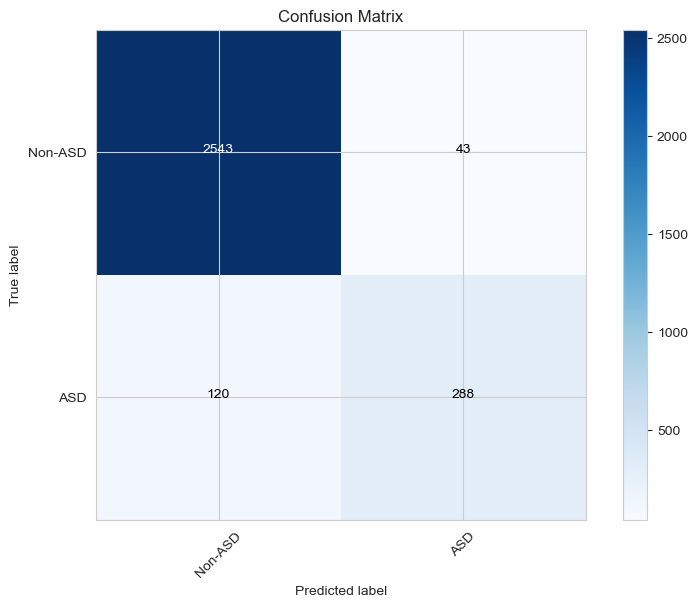

Classification Report:
              precision    recall  f1-score   support

     Non-ASD       0.95      0.98      0.97      2586
         ASD       0.87      0.71      0.78       408

    accuracy                           0.95      2994
   macro avg       0.91      0.84      0.87      2994
weighted avg       0.94      0.95      0.94      2994


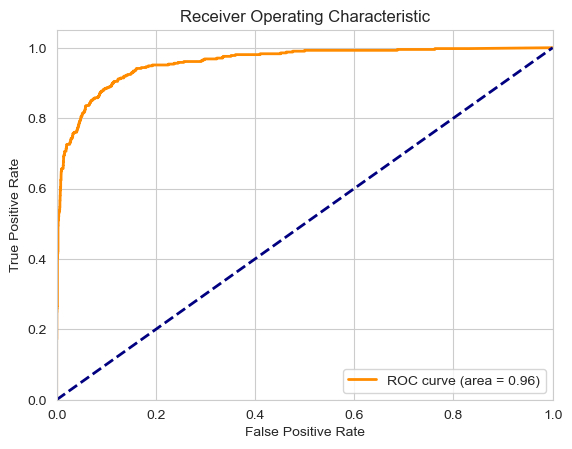

Root Mean Squared Error (RMSE): 0.2333285618368893
Mean Absolute Error (MAE): 0.05444221776887107
Matthews Correlation Coefficient (MCC): 0.7540919092375356


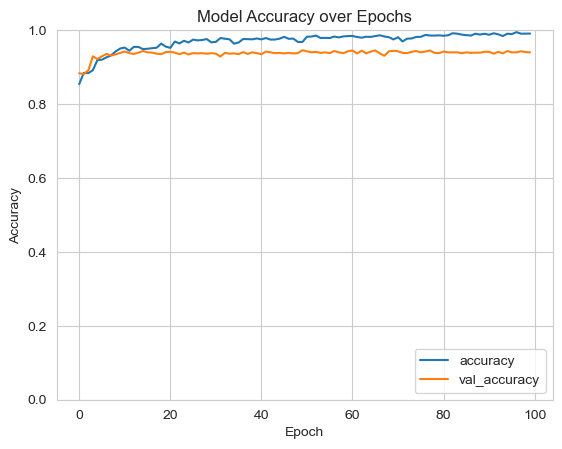

In [1]:
import numpy as np
import cv2
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import matthews_corrcoef


# Load the extracted features
asd_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/InceptionV3/asd_features.npy')
non_asd_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/InceptionV3/non_asd_features.npy')

# Create labels for the features
asd_labels = np.ones(asd_features.shape[0])
non_asd_labels = np.zeros(non_asd_features.shape[0])

# Concatenate features and labels
X = np.vstack([asd_features, non_asd_features])
y = np.concatenate([asd_labels, non_asd_labels])

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=(8, 8, 2048)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
end_time = time.time()

# Calculate training time
elapsed_time = end_time - start_time
print("Model training time:", elapsed_time, "seconds")

# Save the trained model
model.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/InceptionV3/InceptionV3Model.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Non-ASD', 'ASD']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
class_names = ['Non-ASD', 'ASD']
report = classification_report(y_test, y_pred_classes, target_names=class_names, zero_division=0)
print("Classification Report:")
print(report)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_classes, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_classes)
print("Mean Absolute Error (MAE):", mae)

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred_classes)
print("Matthews Correlation Coefficient (MCC):", mcc)

# Learning Curve
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Model Accuracy over Epochs')
plt.legend(loc='lower right')
plt.show()


# ASD and Emotion Detection #

In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from PIL import Image
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/InceptionV3/emotion_model.h5')

# Load the InceptionV3 model without the top classification layers
inceptionV3 = InceptionV3(weights='imagenet', include_top=False)

# Load the pre-trained InceptionV3 model for ASD classification
inceptionV3_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/InceptionV3/InceptionV3Model.h5')

# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    if prediction > 0.5:
        return "ASD", round(float(prediction[0]) * 100, 2)
    else:
        return "Non-ASD", round(float(1 - prediction[0]) * 100, 2)

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0480.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, inceptionV3)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_percentage = predict_asd(input_image_path, inceptionV3_model, inceptionV3)
print("Predicted ASD Label:", predicted_asd_label)
print("ASD Percentage:", asd_percentage)



2024-03-25 07:03:03.879701: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 88ms/step
Predicted Emotion: Joy
Prediction Percentages: {'Angry': 99.88, 'Fear': 99.44, 'Joy': 100.0, 'Sad': 99.96}
1/1 [==============================] - 0s 31ms/step
Predicted ASD Label: ASD
ASD Percentage: 99.99


# ASD XAI LIME #

1/1 [==============================] - 0s 97ms/step
Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.01, 'Fear': 0.02, 'Joy': 99.91, 'Sad': 0.06}
1/1 [==============================] - 0s 24ms/step
ASD 99.99


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 481ms/step


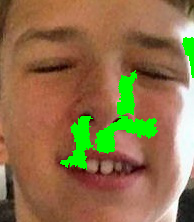

Predicted ASD Label: ASD
ASD Percentage: 99.99


In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, Dense
from PIL import Image
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from tensorflow.keras.models import Model, load_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/InceptionV3/emotion_model.h5')

# Load the InceptionV3 model without the top classification layers
inceptionV3 = InceptionV3(weights='imagenet', include_top=False)

# Load the pre-trained InceptionV3 model for ASD classification
inceptionV3_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/InceptionV3/InceptionV3Model.h5')

base_model = InceptionV3(weights='imagenet', include_top=True)

x = base_model.get_layer('avg_pool').output
x = Dense(2048, activation='relu')(x)
x = Reshape((1, 1, 2048))(x)
x = GlobalAveragePooling2D()(x)
prediction = Dense(1, activation='sigmoid')(x)

lime_model = Model(inputs=base_model.input, outputs=prediction)

target_size = (299, 299)
inceptionV3_Img_scaled = None
# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    global inceptionV3_Img_scaled
    
    limeImg = cv2.imread(image_path)
    limeImg = cv2.resize(limeImg, target_size)
    limeImg = cv2.cvtColor(limeImg, cv2.COLOR_BGR2RGB)
    limeImg = np.expand_dims(limeImg, axis=0)
    limeImg = preprocess_input(limeImg)
    
    inceptionV3_Img_scaled = limeImg / 255.0
    
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    global inceptionV3_Img_scaled
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    if prediction > 0.5:
        print("ASD", round(float(prediction[0]) * 100, 2))
        explainer = LimeImageExplainer()

        # Generate an explanation for the prediction using the explainer object
        explanation = explainer.explain_instance(inceptionV3_Img_scaled[0], lime_model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)
        
        # Visualize the explanation using matplotlib
        temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
        
        # Resize the explanation mask to match the original image dimensions
        mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)
        
        # Convert the mask to the original image mode
        original_image = Image.open(input_image_path)
        #original_image = original_image.convert("L")  # Convert the original image to grayscale
        original_width, original_height = original_image.size
        original_mode = original_image.mode
        
        # Overlay the explanation mask on the original image
        mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
        original_image = np.array(original_image)
        original_image[mask > 0.5] = (0, 255, 0)
        
        # Display the original image with the explanation mask
        display(Image.fromarray(original_image))
        
        return "ASD", round(float(prediction[0]) * 100, 2)
    else:
        return "Non-ASD", round(float(1 - prediction[0]) * 100, 2)

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0480.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, inceptionV3)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_percentage = predict_asd(input_image_path, inceptionV3_model, inceptionV3)
print("Predicted ASD Label:", predicted_asd_label)
print("ASD Percentage:", asd_percentage)

# ASD XAI Grad-CAM #

1/1 [==============================] - 0s 80ms/step
Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.01, 'Fear': 0.02, 'Joy': 99.91, 'Sad': 0.06}
1/1 [==============================] - 0s 25ms/step
ASD 99.99


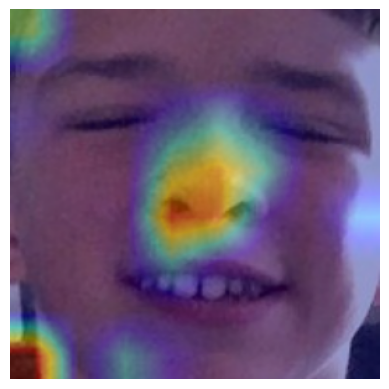

Predicted ASD Label: ASD
ASD Percentage: 99.99


In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import load_model, Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, Dense
from PIL import Image
import tensorflow as tf
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from tensorflow.keras.models import Model, load_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/InceptionV3/emotion_model.h5')

# Load the InceptionV3 model without the top classification layers
inceptionV3 = InceptionV3(weights='imagenet', include_top=False)

# Load the pre-trained InceptionV3 model for ASD classification
inceptionV3_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/InceptionV3/InceptionV3Model.h5')

base_model = InceptionV3(weights='imagenet', include_top=True)

x = base_model.get_layer('avg_pool').output
x = Dense(2048, activation='relu')(x)
x = Reshape((1, 1, 2048))(x)
x = GlobalAveragePooling2D()(x)
prediction = Dense(1, activation='sigmoid')(x)

inceptionV3Model = Model(inputs=base_model.input, outputs=prediction)

target_size = (299, 299)
inceptionV3_grad_img_original = None
inceptionV3_grad_img_for_model = None
inceptionV3_grad_img_scaled = None

def generate_grad_cam(model, img_array, layer_name):
    # Create a model that maps the input image to the desired layer's output
    grad_model = Model(inputs=model.input, outputs=(model.get_layer(layer_name).output, model.output))

    # Compute the gradient of the predicted class with respect to the output feature map of the given layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        predicted_class_output = preds[:, 0]  # ASD class index assuming ASD class is the first one

    grads = tape.gradient(predicted_class_output, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]

    # Compute the heatmap
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU on the heatmap
    heatmap /= np.max(heatmap)  # Normalize

    return heatmap

# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    global inceptionV3_Img_scaled
    global  inceptionV3_grad_img_original 
    global inceptionV3_grad_img_for_model 

    # Process the input image
    inceptionV3_grad_img_original = cv2.imread(input_image_path)
    inceptionV3_grad_img_original = cv2.resize(inceptionV3_grad_img_original, target_size)
    inceptionV3_grad_img_for_model = preprocess_input(np.expand_dims(inceptionV3_grad_img_original, axis=0))

    limeImg = cv2.imread(image_path)
    limeImg = cv2.resize(limeImg, target_size)
    limeImg = cv2.cvtColor(limeImg, cv2.COLOR_BGR2RGB)
    limeImg = np.expand_dims(limeImg, axis=0)
    limeImg = preprocess_input(limeImg)

    inceptionV3_Img_scaled = limeImg / 255.0

    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    global inceptionV3_Img_scaled
    global  inceptionV3_grad_img_original
    global inceptionV3_grad_img_for_model
# Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    if prediction > 0.5:
        print("ASD", round(float(prediction[0]) * 100, 2))
        # explainer = LimeImageExplainer()
        # 
        # # Generate an explanation for the prediction using the explainer object
        # explanation = explainer.explain_instance(inceptionV3_Img_scaled[0], inceptionV3Model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)
        # 
        # # Visualize the explanation using matplotlib
        # temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
        # 
        # # Resize the explanation mask to match the original image dimensions
        # mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)
        # 
        # # Convert the mask to the original image mode
        # original_image = Image.open(input_image_path)
        # #original_image = original_image.convert("L")  # Convert the original image to grayscale
        # original_width, original_height = original_image.size
        # original_mode = original_image.mode
        # 
        # # Overlay the explanation mask on the original image
        # mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
        # original_image = np.array(original_image)
        # original_image[mask > 0.5] = (0, 255, 0)
        # 
        # # Display the original image with the explanation mask
        # display(Image.fromarray(original_image))
        # Visualize the Grad-CAM heatmap
        heatmap = generate_grad_cam(inceptionV3Model, inceptionV3_grad_img_for_model, 'mixed10')
    
        # Resize heatmap to match the size of the original image
        heatmap = cv2.resize(heatmap, (inceptionV3_grad_img_original.shape[1], inceptionV3_grad_img_original.shape[0]))
    
        # Apply colormap for better visualization
        heatmap = np.uint8(255 * heatmap)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
        # Superimpose the heatmap on the original image
        superimposed_img = cv2.addWeighted(inceptionV3_grad_img_original, 0.6, heatmap, 0.4, 0)
    
        # Display the superimposed image
        plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        return "ASD", round(float(prediction[0]) * 100, 2)
    else:
        return "Non-ASD", round(float(1 - prediction[0]) * 100, 2)

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0480.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, inceptionV3)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_percentage = predict_asd(input_image_path, inceptionV3_model, inceptionV3)
print("Predicted ASD Label:", predicted_asd_label)
print("ASD Percentage:", asd_percentage)

# Emotion XAI LIME #

2024-03-28 01:09:50.450664: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 87ms/step


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 500ms/step


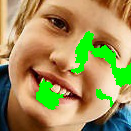

Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.0, 'Fear': 0.0, 'Joy': 100.0, 'Sad': 0.0}
1/1 [==============================] - 0s 92ms/step
Predicted ASD Label: Non-ASD
ASD Percentage: 99.36


In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, Dense
from PIL import Image
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from tensorflow.keras.models import Model, load_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/InceptionV3/emotion_model.h5')

# Load the inceptionV3 model without the top classification layers
inceptionV3 = InceptionV3(weights='imagenet', include_top=False)

# Load the pre-trained InceptionV3 model for ASD classification
inceptionV3_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/InceptionV3/InceptionV3Model.h5')

base_model = InceptionV3(weights='imagenet', include_top=True)

x = base_model.get_layer('avg_pool').output
x = Dense(2048, activation='relu')(x)
x = Reshape((1, 1, 2048))(x)
x = GlobalAveragePooling2D()(x)
prediction = Dense(1, activation='sigmoid')(x)

lime_model = Model(inputs=base_model.input, outputs=prediction)

target_size = (299, 299)
inceptionV3_Img_scaled = None
# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    global inceptionV3_Img_scaled

    limeImg = cv2.imread(image_path)
    limeImg = cv2.resize(limeImg, target_size)
    limeImg = cv2.cvtColor(limeImg, cv2.COLOR_BGR2RGB)
    limeImg = np.expand_dims(limeImg, axis=0)
    limeImg = preprocess_input(limeImg)

    inceptionV3_Img_scaled = limeImg / 255.0

    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    global inceptionV3_Img_scaled
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    explainer = LimeImageExplainer()

    # Generate an explanation for the prediction using the explainer object
    explanation = explainer.explain_instance(inceptionV3_Img_scaled[0], lime_model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)

    # Visualize the explanation using matplotlib
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

    # Resize the explanation mask to match the original image dimensions
    mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)

    # Convert the mask to the original image mode
    original_image = Image.open(input_image_path)
    #original_image = original_image.convert("L")  # Convert the original image to grayscale
    original_width, original_height = original_image.size
    original_mode = original_image.mode

    # Overlay the explanation mask on the original image
    mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
    original_image = np.array(original_image)
    original_image[mask > 0.5] = (0, 255, 0)

    # Display the original image with the explanation mask
    display(Image.fromarray(original_image))

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    if prediction > 0.5:
        print("ASD", round(float(prediction[0]) * 100, 2))
        

        return "ASD", round(float(prediction[0]) * 100, 2)
    else:
        return "Non-ASD", round(float(1 - prediction[0]) * 100, 2)

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0049.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, inceptionV3)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_percentage = predict_asd(input_image_path, inceptionV3_model, inceptionV3)
print("Predicted ASD Label:", predicted_asd_label)
print("ASD Percentage:", asd_percentage)

# Emotion XAI Grad-CAM #

1/1 [==============================] - 0s 102ms/step


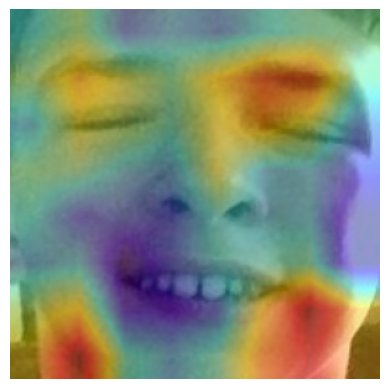

Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.01, 'Fear': 0.02, 'Joy': 99.91, 'Sad': 0.06}
1/1 [==============================] - 0s 33ms/step
ASD 99.99
Predicted ASD Label: ASD
ASD Percentage: 99.99


In [2]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import load_model, Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, Dense
from PIL import Image
import tensorflow as tf
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from tensorflow.keras.models import Model, load_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/InceptionV3/emotion_model.h5')

# Load the InceptionV3 model without the top classification layers
inceptionV3 = InceptionV3(weights='imagenet', include_top=False)

# Load the pre-trained InceptionV3 model for ASD classification
inceptionV3_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/InceptionV3/InceptionV3Model.h5')

base_model = InceptionV3(weights='imagenet', include_top=True)

x = base_model.get_layer('avg_pool').output
x = Dense(2048, activation='relu')(x)
x = Reshape((1, 1, 2048))(x)
x = GlobalAveragePooling2D()(x)
prediction = Dense(1, activation='sigmoid')(x)

inceptionV3Model = Model(inputs=base_model.input, outputs=prediction)

target_size = (299, 299)
inceptionV3_grad_img_original = None
inceptionV3_grad_img_for_model = None
inceptionV3_grad_img_scaled = None

def generate_grad_cam(model, img_array, layer_name):
    # Create a model that maps the input image to the desired layer's output
    grad_model = Model(inputs=model.input, outputs=(model.get_layer(layer_name).output, model.output))

    # Compute the gradient of the predicted class with respect to the output feature map of the given layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        predicted_class_output = preds[:, 0]  # ASD class index assuming ASD class is the first one

    grads = tape.gradient(predicted_class_output, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]

    # Compute the heatmap
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU on the heatmap
    heatmap /= np.max(heatmap)  # Normalize

    return heatmap

# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    global inceptionV3_Img_scaled
    global  inceptionV3_grad_img_original
    global inceptionV3_grad_img_for_model

    # Process the input image
    inceptionV3_grad_img_original = cv2.imread(input_image_path)
    inceptionV3_grad_img_original = cv2.resize(inceptionV3_grad_img_original, target_size)
    inceptionV3_grad_img_for_model = preprocess_input(np.expand_dims(inceptionV3_grad_img_original, axis=0))

    limeImg = cv2.imread(image_path)
    limeImg = cv2.resize(limeImg, target_size)
    limeImg = cv2.cvtColor(limeImg, cv2.COLOR_BGR2RGB)
    limeImg = np.expand_dims(limeImg, axis=0)
    limeImg = preprocess_input(limeImg)

    inceptionV3_Img_scaled = limeImg / 255.0

    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    global  inceptionV3_grad_img_original
    global inceptionV3_grad_img_for_model
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    heatmap = generate_grad_cam(inceptionV3Model, inceptionV3_grad_img_for_model, 'mixed10')

    # Resize heatmap to match the size of the original image
    heatmap = cv2.resize(heatmap, (inceptionV3_grad_img_original.shape[1], inceptionV3_grad_img_original.shape[0]))

    # Apply colormap for better visualization
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose the heatmap on the original image
    superimposed_img = cv2.addWeighted(inceptionV3_grad_img_original, 0.6, heatmap, 0.4, 0)

    # Display the superimposed image
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    global inceptionV3_Img_scaled

    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    if prediction > 0.5:
        print("ASD", round(float(prediction[0]) * 100, 2))
        # explainer = LimeImageExplainer()
        # 
        # # Generate an explanation for the prediction using the explainer object
        # explanation = explainer.explain_instance(inceptionV3_Img_scaled[0], inceptionV3Model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)
        # 
        # # Visualize the explanation using matplotlib
        # temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
        # 
        # # Resize the explanation mask to match the original image dimensions
        # mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)
        # 
        # # Convert the mask to the original image mode
        # original_image = Image.open(input_image_path)
        # #original_image = original_image.convert("L")  # Convert the original image to grayscale
        # original_width, original_height = original_image.size
        # original_mode = original_image.mode
        # 
        # # Overlay the explanation mask on the original image
        # mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
        # original_image = np.array(original_image)
        # original_image[mask > 0.5] = (0, 255, 0)
        # 
        # # Display the original image with the explanation mask
        # display(Image.fromarray(original_image))
        # Visualize the Grad-CAM heatmap
       

        return "ASD", round(float(prediction[0]) * 100, 2)
    else:
        return "Non-ASD", round(float(1 - prediction[0]) * 100, 2)

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0480.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, inceptionV3)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_percentage = predict_asd(input_image_path, inceptionV3_model, inceptionV3)
print("Predicted ASD Label:", predicted_asd_label)
print("ASD Percentage:", asd_percentage)